# TOV

In [75]:
import matplotlib.pyplot as plt
import numpy as np

import kuibit
import kuibit.cactus_scalars as cs
import kuibit.simdir as sd

from kuibit import grid_data as gd

## 12

In [76]:
#contains all the content of the simulation
sim = sd.SimDir("/home/giulia/simulations/TOV_test/")

In [77]:
#from sim we can extract all the timeseries in the simulation
timeseries = sim.timeseries
print(timeseries)

Folder /home/giulia/simulations/TOV_test
/home/giulia/simulations/TOV_test
Available scalar timeseries:
[]

Available minimum timeseries:
['eps', 'alp', 'M1', 'M2', 'M3', 'w_lorentz', 'H', 'dens', 'betax', 'betay', 'betaz', 'vel[0]', 'vel[1]', 'vel[2]']

Available maximum timeseries:
['alp', 'press', 'M1', 'M2', 'M3', 'betax', 'betay', 'betaz', 'rho', 'vel[0]', 'vel[1]', 'vel[2]', 'w_lorentz', 'dens', 'eps', 'H']

Available norm1 timeseries:
['H', 'M1', 'M2', 'M3']

Available norm2 timeseries:
['H', 'M1', 'M2', 'M3']

Available average timeseries:
['physical_time_per_hour', 'current_physical_time_per_hour', 'time_total', 'time_evolution', 'time_computing', 'time_communicating', 'time_io', 'evolution_steps_count', 'local_grid_points_per_second', 'total_grid_points_per_second', 'local_grid_point_updates_count', 'total_grid_point_updates_count', 'local_interior_points_per_second', 'total_interior_points_per_second', 'local_interior_point_updates_count', 'total_interior_point_updates_count

In [78]:
rho_max=timeseries.maximum.fields.rho

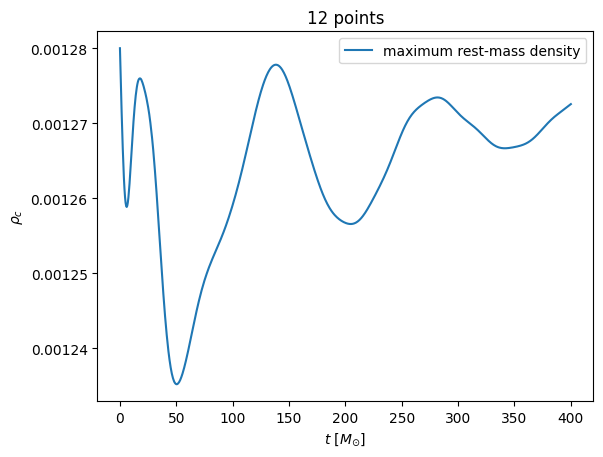

In [79]:
plt.plot(rho_max, label="maximum rest-mass density")
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c $')
plt.legend()
plt.title('12 points')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/12.png")
plt.show()

In [80]:
#values on the grid
gf = sim.gf

print(gf)


Available grid data of dimension 1D (x): 
['rho', 'M2', 'M3', 'alp', 'betay', 'M1', 'betax', 'H', 'betaz']


Available grid data of dimension 1D (y): 
['betay', 'M1', 'betaz', 'rho', 'betax', 'alp', 'H', 'M3', 'M2']


Available grid data of dimension 1D (z): 
['betay', 'rho', 'alp', 'M1', 'H', 'M3', 'betax', 'betaz', 'M2']


Available grid data of dimension 2D (xy): 
['vel[2]', 'H', 'betaz', 'M3', 'betax', 'M2', 'w_lorentz', 'vel[1]', 'betay', 'rho', 'eps', 'alp', 'M1', 'vel[0]']


Available grid data of dimension 2D (xz): 
['betay', 'M2', 'M3', 'H', 'betax', 'M1', 'vel[1]', 'w_lorentz', 'betaz', 'rho', 'eps', 'vel[0]', 'alp', 'vel[2]']


Available grid data of dimension 2D (yz): 
['betay', 'eps', 'H', 'alp', 'w_lorentz', 'betaz', 'betax', 'M3', 'M2', 'M1', 'vel[1]', 'vel[0]', 'rho', 'vel[2]']


Available grid data of dimension 3D (xyz): 
[]



In [81]:
vars2D = gf.xy  # 2D variablse on the x-y plane

print(vars2D)


Available grid data of dimension 2D (xy): 
['vel[2]', 'H', 'betaz', 'M3', 'betax', 'M2', 'w_lorentz', 'vel[1]', 'betay', 'rho', 'eps', 'alp', 'M1', 'vel[0]']



In [82]:
rho = vars2D.fields.rho # rho on the x-y plane

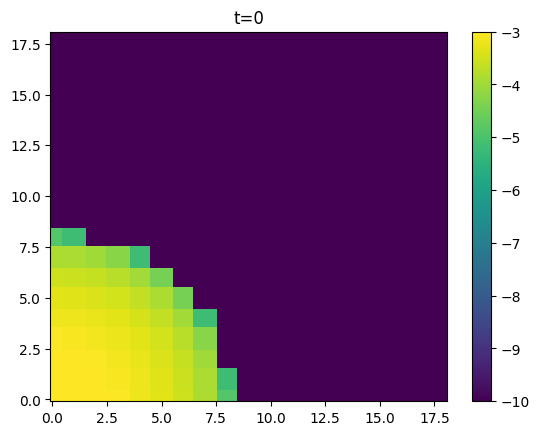

In [83]:
# we create a 2D grid
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])

# then we interpolate rho on the grid
rho_small = rho.read_on_grid(0, small_grid)  #initial data

#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=0')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/12_i.png")

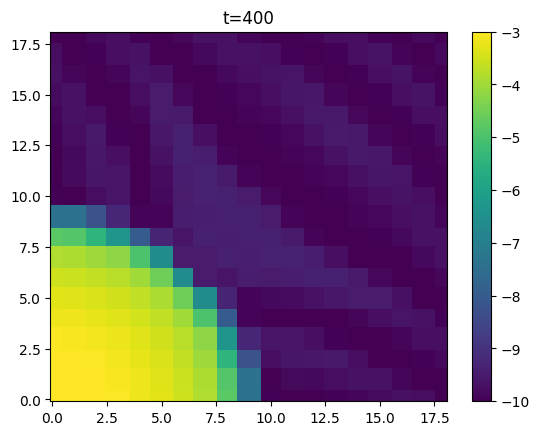

In [84]:
# we create a 2D grid
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])

# then we interpolate rho on the grid
rho_small = rho.read_on_grid(rho.iterations[-1], small_grid)  #final data

#cf = plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=400')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/12_f.png")

In [85]:
#for i in rho.iterations:
#    print(i)
#    rho_small = rho.read_on_grid(i, small_grid)
#    cf2=plt.contourf(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
#    plt.savefig("frame_"+str(i)+".png")

In [86]:
'''
from IPython.display import HTML
import matplotlib.animation as animation
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())
'''

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_696/1863715385.py:1: SyntaxWarning: invalid escape sequence '\o'
  '''


'\nfrom IPython.display import HTML\nimport matplotlib.animation as animation\nims = []\nfig,ax = plt.subplots()\n\nfor i in rho.iterations[0::1]:\n    rho_small = rho.read_on_grid(i, small_grid)\n    ax.set_xlabel(r\'$x (M_\\odot)$\')\n    ax.set_ylabel(r\'$y (M_\\odot)$\')\n    ax.set_aspect(\'equal\')\n    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)\n    plt.plot()\n    #plt.colorbar(im)\n    title = ax.text(0.5,1.05,(\'Time=\'+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)\n    ims.append([im, title])\n    plt.close()\n\n\nani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)\nHTML(ani.to_jshtml())\n'

# 24

In [87]:
sim = sd.SimDir("/home/giulia/simulations/TOV24/")

timeseries = sim.timeseries

rho_max=timeseries.maximum.fields.rho

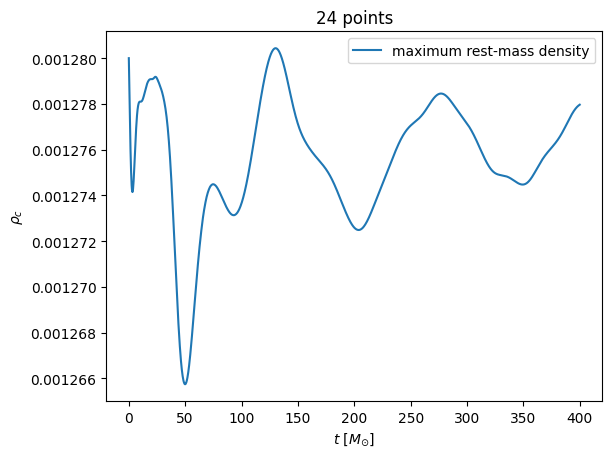

In [88]:
plt.plot(rho_max, label="maximum rest-mass density")
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c $')
plt.legend()
plt.title('24 points')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/24.png")
plt.show()

In [89]:
gf = sim.gf
vars2D = gf.xy 
rho = vars2D.fields.rho

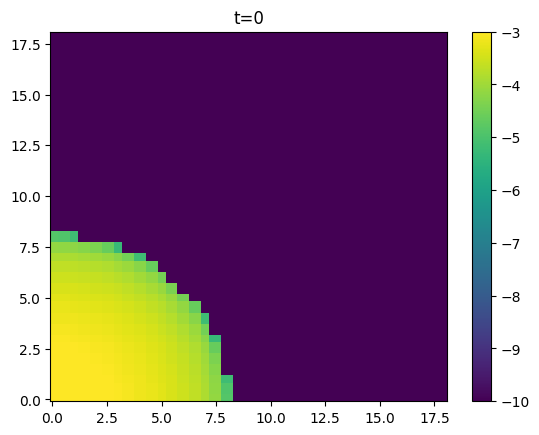

In [90]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])
rho_small = rho.read_on_grid(0, small_grid)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=0')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/24_i.png")

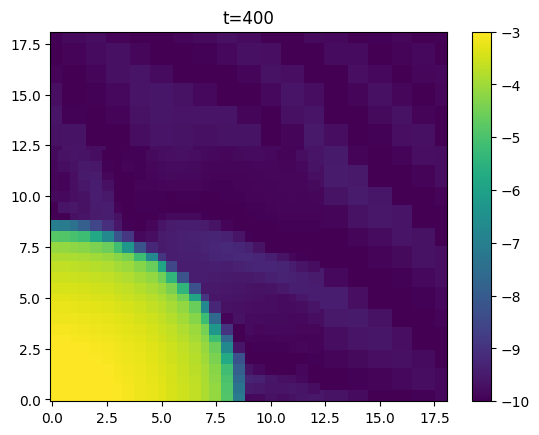

In [91]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])
rho_small = rho.read_on_grid(rho.iterations[-1], small_grid)  #final data
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=400')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/24_f.png")

In [92]:
'''
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())
'''

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_696/3477987301.py:1: SyntaxWarning: invalid escape sequence '\o'
  '''


'\nims = []\nfig,ax = plt.subplots()\n\nfor i in rho.iterations[0::1]:\n    rho_small = rho.read_on_grid(i, small_grid)\n    ax.set_xlabel(r\'$x (M_\\odot)$\')\n    ax.set_ylabel(r\'$y (M_\\odot)$\')\n    ax.set_aspect(\'equal\')\n    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)\n    plt.plot()\n    #plt.colorbar(im)\n    title = ax.text(0.5,1.05,(\'Time=\'+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)\n    ims.append([im, title])\n    plt.close()\n\n\nani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)\nHTML(ani.to_jshtml())\n'

# 30

In [93]:
sim = sd.SimDir("/home/giulia/simulations/TOV30/")

timeseries = sim.timeseries

rho_max=timeseries.maximum.fields.rho

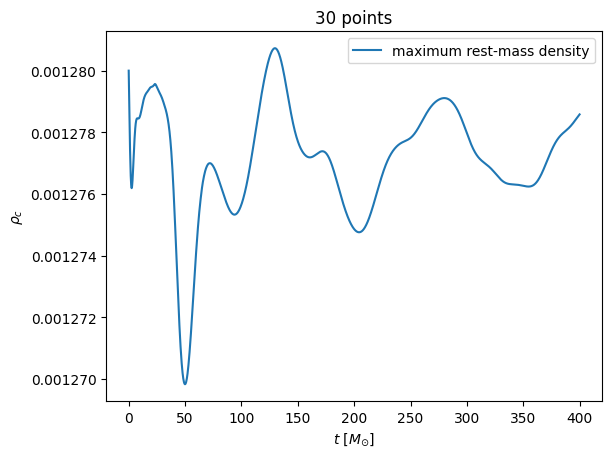

In [94]:
plt.plot(rho_max, label="maximum rest-mass density")
plt.xlabel(r'$t$ [$M_{\odot}$]')
plt.ylabel(r'$\rho_c $')
plt.legend()
plt.title('30 points')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/30.png")
plt.show()

In [95]:
gf = sim.gf
vars2D = gf.xy 
rho = vars2D.fields.rho

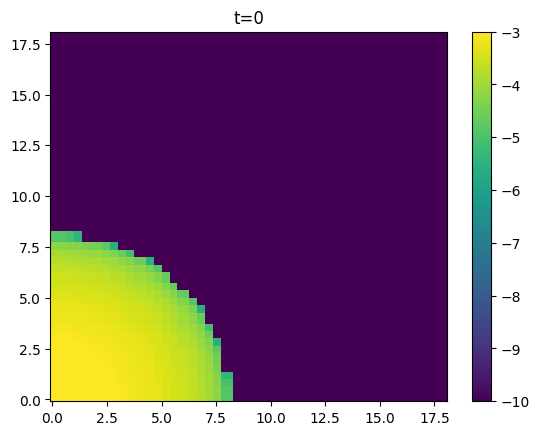

In [96]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])
rho_small = rho.read_on_grid(0, small_grid)
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=0')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/30_i.png")

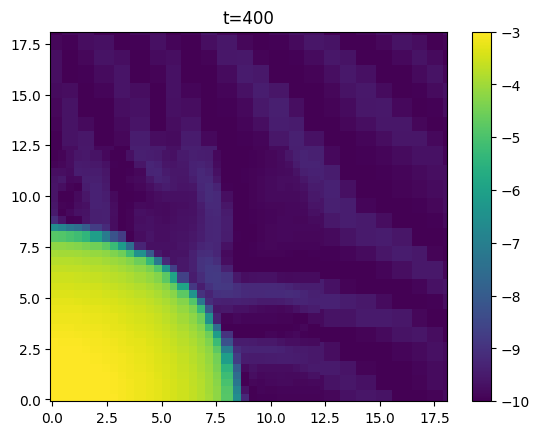

In [97]:
small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])
rho_small = rho.read_on_grid(rho.iterations[-1], small_grid)  #final data
cf = plt.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), vmin=-10, vmax=-3)
plt.colorbar(cf)

plt.title('t=400')
plt.savefig("/home/giulia/einstein_toolkit/images/TOV/30_f.png")

In [98]:
'''
ims = []
fig,ax = plt.subplots()

for i in rho.iterations[0::1]:
    rho_small = rho.read_on_grid(i, small_grid)
    ax.set_xlabel(r'$x (M_\odot)$')
    ax.set_ylabel(r'$y (M_\odot)$')
    ax.set_aspect('equal')
    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)
    plt.plot()
    #plt.colorbar(im)
    title = ax.text(0.5,1.05,('Time='+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)
    ims.append([im, title])
    plt.close()
    

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())
'''

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_696/3477987301.py:1: SyntaxWarning: invalid escape sequence '\o'
  '''


'\nims = []\nfig,ax = plt.subplots()\n\nfor i in rho.iterations[0::1]:\n    rho_small = rho.read_on_grid(i, small_grid)\n    ax.set_xlabel(r\'$x (M_\\odot)$\')\n    ax.set_ylabel(r\'$y (M_\\odot)$\')\n    ax.set_aspect(\'equal\')\n    im = ax.pcolormesh(*rho_small.coordinates_meshgrid(), np.log10(rho_small.data_xyz), animated=True, vmin=-10, vmax=-3)\n    plt.plot()\n    #plt.colorbar(im)\n    title = ax.text(0.5,1.05,(\'Time=\'+str(rho.available_times[i//2048])), size=plt.rcParams["axes.titlesize"], ha="center", transform=ax.transAxes)\n    ims.append([im, title])\n    plt.close()\n\n\nani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)\nHTML(ani.to_jshtml())\n'